In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from collections import OrderedDict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

## Define Problem ##

Pertumbuh penjualan perusahaan tidak sesuai target yang diinginkan

## Goal ##

memberikan data pelanggan yang memiliki presentase respone positif lebih besar agar target marketing terfokuskan sehingga pertumbuh penjualan akan meningkat dengan cara yang lebih efisien.

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.drop(columns='id', inplace=True)

In [7]:
df.shape

(381109, 11)

In [8]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df[df.duplicated()]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35754,Male,23,1,15.0,0,< 1 Year,No,2630.0,152.0,173,0
41515,Male,39,1,30.0,0,1-2 Year,Yes,2630.0,124.0,27,0
43618,Male,40,1,28.0,1,1-2 Year,No,2630.0,124.0,209,0
44049,Male,39,1,28.0,0,1-2 Year,Yes,2630.0,124.0,64,0
44203,Male,44,1,28.0,0,> 2 Years,Yes,2630.0,124.0,155,1
...,...,...,...,...,...,...,...,...,...,...,...
379273,Male,58,1,30.0,1,1-2 Year,No,2630.0,152.0,150,0
379451,Male,41,1,30.0,0,1-2 Year,Yes,2630.0,156.0,111,0
379788,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,42,0
380673,Female,37,1,28.0,0,1-2 Year,Yes,2630.0,156.0,176,0


In [12]:
df.duplicated().value_counts()

False    380840
True        269
dtype: int64

In [13]:
df.drop_duplicates(inplace=True) # menghapus duplikasi data
df.shape

(380840, 11)

In [14]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,380840,380840,380840
unique,2,3,2
top,Male,1-2 Year,Yes
freq,205938,200167,192277


In [16]:
bins= [20,40,60,85]
labels = [1,2,3]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,3
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,1
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,1
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,3


In [17]:
(pd.crosstab(index=df['Previously_Insured'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
Previously_Insured,,
0,77.45,22.55
1,99.91,0.09


Penjualan sebaiknya difokuskan kepada calon-calon konsumen yang belum memiliki asuransi sebelumnya. Jika sulit, maka yang harus dilakukan adalah melakukan edukasi lebih terhadap kelebihan atau keunikan perusahaan kita ketimbang pesaing.

In [18]:
(pd.crosstab(index=df['Driving_License'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
Driving_License,,
0,94.95,5.05
1,87.73,12.27


Mengincar pasar dengan mencari data calon konsumen yang sudah memiliki izin berkendara atau belum tidak sepadan dengan efek penjualan.

In [19]:
(pd.crosstab(index=df['Vehicle_Damage'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
Vehicle_Damage,,
No,99.48,0.52
Yes,76.23,23.77


"Mencegah lebih baik dari pada mengobati" sepertinya pepatah yang sering kali tidak teredukasi dengan baik kepada calon konsumen. Disarankan untuk membuka info finansial secara detail untuk mengedukasi calon konsumen akan keuntungan ikut asuransi sebelum hal-hal buruk terjadi. 

In [20]:
(pd.crosstab(index=df['Gender'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
Gender,,
Female,89.61,10.39
Male,86.16,13.84


Faktor gender tidak berpengaruh besar pada penjualan.

In [22]:
(pd.crosstab(index=df['AgeGroup'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
AgeGroup,,
1,91.77,8.23
2,80.12,19.88
3,90.03,9.97


Kebanyakan konsumen yang tertarik adalah orang-orang dengan umur menengah ya itu umur 40-60 tahun.
Analisa saya adalah umur dibawah itu belum terlalu khawatir akan resiko-resiko yang kemungkinan bisa terjadi, sedangkan untuk umur diatas 60 tahun tidak lagi mempedulikan soal keuangan, tidak masalah jika uang mereka habis untuk biaya pengobatan.

saran saya adalah untuk mengedukasi calon-calon konsumen yang ada pada grup umur menengah yaitu 40-60 untuk mendaftarkan asuransi kepada anak-anak mereka, sanak saudara, dll. Bisa dengan cara memberi promo jika konsumen di umur menengah mendaftar, mereka akan mendapatkan harga yang lebih murah untuk orang lain yang berumur 20-40 tahun.

Untuk menggaet pasar calon konsumen diatas 60 tahun lebih baik melakukan edukasi tentang kekeluargaan, keakraban, keindahan dalam rumah tangga dengan anak dan cucu-cucu mereka. Selain itu tunjukan edukasi bahwa asuransi dapat mengurangi atau memperpanjang harapan hidup dengan membantu finansial mereka ketika sedang sakit-sakitan.

In [23]:
(pd.crosstab(index=df['Policy_Sales_Channel'], columns = df['Response'],normalize= 'index')*100).round(2)

Response,0,1
Policy_Sales_Channel,,
1.0,96.74,3.26
2.0,75.00,25.00
3.0,69.60,30.40
4.0,79.96,20.04
6.0,100.00,0.00
...,...,...
157.0,73.16,26.84
158.0,72.56,27.44
159.0,98.04,1.96


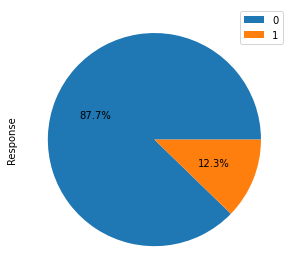

In [24]:
df['Response'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

# Encoding #

In [25]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,3
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,1
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,1
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,3


In [26]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).round(1)

df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1,'> 2 Years':2}).round(1)

df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1}).round(1)

In [27]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,2
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,3
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,2
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0,1
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88,0,3
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131,0,1
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161,0,1
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0,3


# Machine Learning #

<AxesSubplot:>

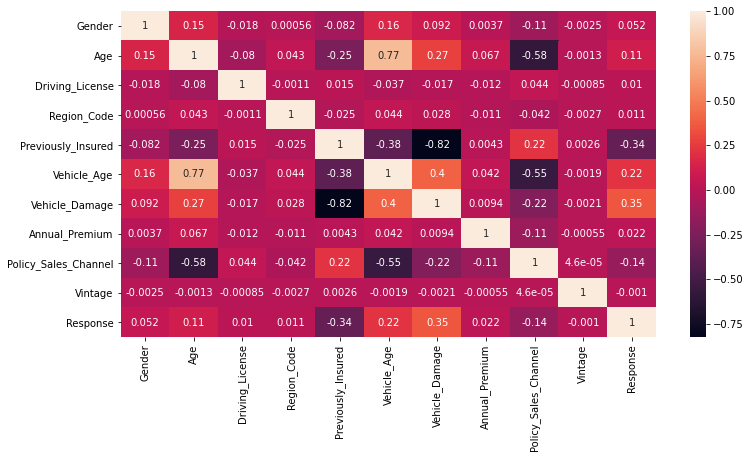

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True)

In [29]:
# df.drop(columns='Annual_Premium', inplace=True)
# df.drop(columns='Vintage', inplace=True)

In [30]:
from sklearn.utils import resample

In [31]:
non_fraud = df[df['Response'] == 0] ## Kelas Majority
fraud = df[df['Response'] == 1] ## Kelas Minority

In [32]:
non_fraud_undersample = resample(non_fraud, ## Kelas Majority yg akan di undersampling
                                replace=False,
                                n_samples = len(fraud), ## Jumlah Kelas Minority
                                random_state = 42)

In [33]:
df_UnderSample = pd.concat([non_fraud_undersample, fraud])

In [34]:
df_UnderSample['Response'].value_counts()

1    46685
0    46685
Name: Response, dtype: int64

In [35]:
df_UnderSample.dtypes

Gender                     int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
AgeGroup                category
dtype: object

In [36]:
df_UnderSample['Vehicle_Damage'].value_counts()

1    66091
0    27279
Name: Vehicle_Damage, dtype: int64

In [37]:
df_UnderSample.dtypes

Gender                     int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age                int64
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
AgeGroup                category
dtype: object

In [38]:
df_UnderSample.dropna(axis=0,inplace=True)

In [39]:
X = df_UnderSample.drop(columns=['Response','Annual_Premium','Vintage'])
y = df_UnderSample['Response']

In [40]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'AgeGroup'],
      dtype='object')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y,random_state = 1)

In [42]:
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# x_test=sc.fit_transform(X_test)

# Tree #

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
print(tree.score(X_train,y_train))

0.8721467300354776


In [45]:
param_tree = {"ccp_alpha" : [100, 200, 500, 700, 1000],
          "max_depth" : [None, 5, 7, 9, 20, 25],
          "min_samples_split" : [2, 9, 15, 25],
          "min_samples_leaf" : [1, 2, 5, 10],
          "max_features" : [None, .8, .7, .6]}

model_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv = 4, n_jobs=-1, verbose=1)
model_tree.fit(X_train, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed:  8.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [100, 200, 500, 700, 1000],
              

In [46]:
model_tree.score(X_train, y_train)

0.5000066938884798

In [47]:
y_pred = tree.predict(X_test)

In [48]:
y_pred_tun = model_tree.predict(X_test)

In [49]:
acc_tree = accuracy_score(y_test, y_pred)
acc_tree

0.7481525115133341

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_tree = precision_score(y_test, y_pred)

rec_tree = recall_score(y_test, y_pred, pos_label=1)

f1_tree = f1_score(y_test, y_pred)

recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      9337
           1       0.73      0.79      0.76      9337

    accuracy                           0.75     18674
   macro avg       0.75      0.75      0.75     18674
weighted avg       0.75      0.75      0.75     18674



In [51]:
tree_fit=tree.fit(X_test,y_test)
cm=confusion_matrix(y_test,tree_fit.predict(X_test))
    
TN, FP, FN, TP = confusion_matrix(y_test,tree_fit.predict(X_test)).ravel()
    
test_score=(TP + TN)/(TP + TN + FN + FP)
    
print(cm)
print('Model[{}] Testing Accuracy="{}"'.format(0,test_score))
print()

[[8291 1046]
 [ 696 8641]]
Model[0] Testing Accuracy="0.9067152190210989"



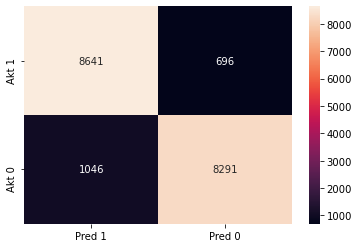

In [52]:
y_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

In [53]:
cm_tree

array([[8641,  696],
       [1046, 8291]], dtype=int64)

# RF #

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
print(RF.score(X_train,y_train))

0.8721467300354776


In [56]:
param_RF = {"n_estimators" : [100, 200],
          "max_depth" : [None, 5],
          "min_samples_split" : [2, 9],
          "min_samples_leaf" : [1, 2],
          "max_features" : [None, .8]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  9.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [57]:
print(model_RF.score(X_train, y_train))

0.7944039092308722


In [58]:
y_pred_rf = RF.predict(X_test)

In [59]:
acc_RF = accuracy_score(y_test, y_pred)
acc_RF

0.7481525115133341

In [60]:
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      9337
           1       0.73      0.85      0.78      9337

    accuracy                           0.77     18674
   macro avg       0.77      0.77      0.77     18674
weighted avg       0.77      0.77      0.77     18674



In [61]:
rf_fit=RF.fit(X_test,y_test)
cm=confusion_matrix(y_test,tree_fit.predict(X_test))
    
TN, FP, FN, TP = confusion_matrix(y_test,tree_fit.predict(X_test)).ravel()
    
test_score=(TP + TN)/(TP + TN + FN + FP)
    
print(cm)
print('Model[{}] Testing Accuracy="{}"'.format(0,test_score))
print()

[[8291 1046]
 [ 696 8641]]
Model[0] Testing Accuracy="0.9067152190210989"



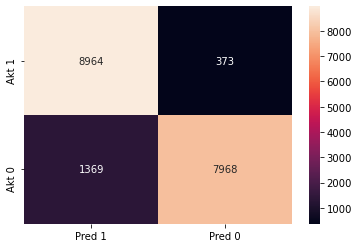

In [62]:
y_RF = RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

In [63]:
cm_RF

array([[8964,  373],
       [1369, 7968]], dtype=int64)

# KNN #

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_cf=KNeighborsClassifier()
knn_cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
print(knn_cf.score(X_train,y_train))

0.8055559274382489


In [67]:
param_KNN = {"n_neighbors" : [5, 10, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_cf, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [68]:
print(model_knn.score(X_train,y_train))

0.7853403842291987


In [69]:
y_pred = knn_cf.predict(X_test)

In [70]:
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.746331798222127

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred)

rec_knn = recall_score(y_test, y_pred, pos_label=1)

f1_knn = f1_score(y_test, y_pred)

recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      9337
           1       0.71      0.83      0.77      9337

    accuracy                           0.75     18674
   macro avg       0.75      0.75      0.74     18674
weighted avg       0.75      0.75      0.74     18674



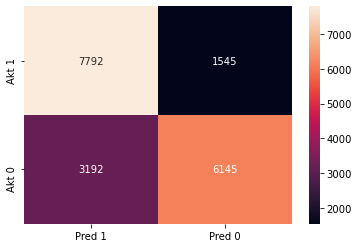

In [72]:
y_KNN = knn_cf.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

In [73]:
data = {
    "KNN" : [acc_knn, prec_knn, rec_knn, f1_knn],
    "RF" : [acc_RF, prec_RF, rec_RF, f1_RF],
    "Tree" : [acc_tree, prec_tree, rec_tree, f1_tree]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,KNN,RF,Tree
Accuracy,0.746332,0.748153,0.748153
Precision,0.709395,0.730169,0.730135
Recall,0.834529,0.846846,0.787298
F1 Score,0.766891,0.784191,0.757640


# AUC #

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [75]:
y_pred_tree= tree.predict(X_test)

In [76]:
roc_auc_score(y_test, y_pred_tree)

0.906715219021099

In [77]:
y_proba_tree = tree.predict_proba(X_test)

In [78]:
pred_1 = y_proba[ : , 1]

NameError: name 'y_proba' is not defined

In [ ]:
roc_curve(y_test, pred_1)

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [ ]:
score_auc = round(auc(fpr, tpr),2)

In [ ]:
plt.figure(figsize=(13, 8))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
# plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()